Warning message:
"package 'rbcb' was built under R version 3.6.3"

[1] "Captação total em milhares de reais = R$39391569.57"


ERROR: Error in View(captacao_liquida): 'View()' not yet supported in the Jupyter R kernel


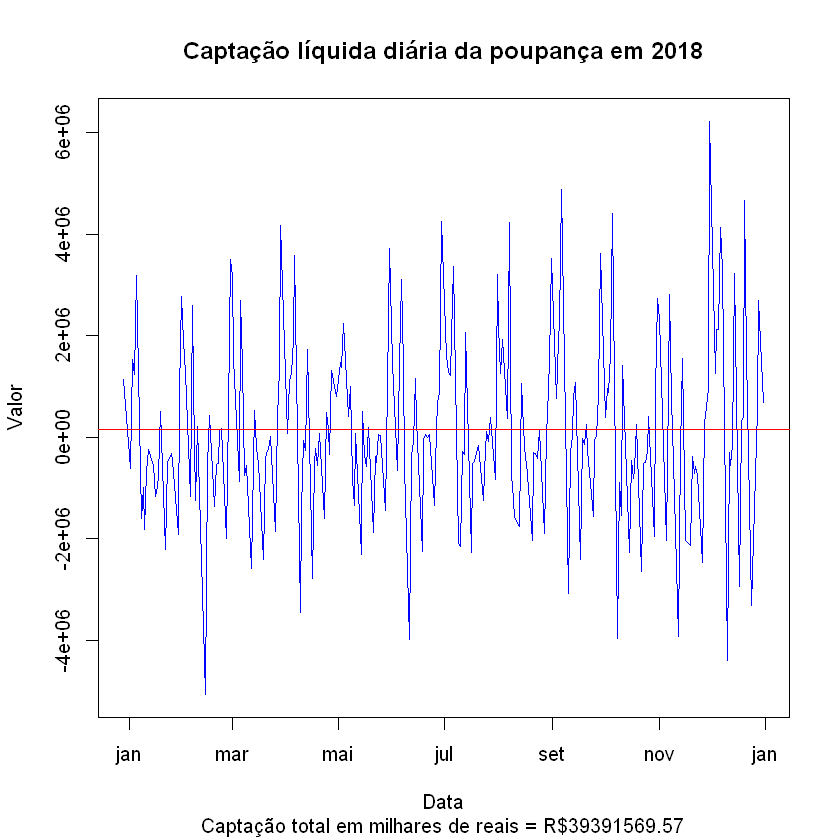

In [1]:
library(rbcb)
start_date <- as.Date("2018-01-01")
end_date <- as.Date("2018-12-31")
captacao_liquida <- get_series(c(24), start_date = start_date,
                               end_date = end_date)
captacao_liquida <- data.frame(captacao_liquida)
captacao_liquida <- captacao_liquida[,-3]
colnames(captacao_liquida) <- c("Data", "Valor")
media <- mean(captacao_liquida$Valor)
total <- round(sum(captacao_liquida$Valor), 2)
plot(captacao_liquida$Data, captacao_liquida$Valor,
     type = "l", xlab = "Data", ylab = "Valor",
     main = format(start_date,"Captação líquida diária da poupança em %Y"),
     sub = print(paste0("Captação total em milhares de reais = R$", total)),
     col = "blue")
abline(h = media, col = "red", lwd = 1)
View(captacao_liquida)